# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Controlling Threads
from threadpoolctl import threadpool_info
from pprint import pprint
pprint(threadpool_info())
from threadpoolctl import threadpool_limits

# Common imports
import numpy as np
import os


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

[{'filepath': 'C:\\Users\\edwar\\anaconda3\\envs\\ml_learning\\Library\\bin\\mkl_rt.1.dll',
  'internal_api': 'mkl',
  'num_threads': 6,
  'prefix': 'mkl_rt',
  'threading_layer': 'intel',
  'user_api': 'blas',
  'version': '2021.2-Product'},
 {'filepath': 'C:\\Windows\\System32\\vcomp140.dll',
  'internal_api': 'openmp',
  'num_threads': 12,
  'prefix': 'vcomp',
  'user_api': 'openmp',
  'version': None}]


# Unsupervised Learning

"The vast majority of the available data is unlabeled: we have the input features X, but we do  
not have the labels y."

"The computer scientist Yann LeCun famously said that 'if intelligence  
was a cake, unsupervised learning would be the cake, supervised learning  
would be the icing on the cake, and reinforcement learning would be the cherry on  
the cake.'"

"In other words, there is a huge potential in unsupervised learning that we  
have only barely started to sink our teeth into." 

"In Chapter 8 we looked at the most common unsupervised learning task: dimensionality  
reduction. In this chapter we will look at a few more unsupervised learning tasks  
and algorithms:"

- Clustering
    - The goal is to group similar instances together into clusters. Clustering is a great  
        tool for data analysis, customer segmentation, recommender systems, search  
        engines, image segmentation, semi-supervised learning, dimensionality reduction,  
        and more.  
          
          
- Anomaly detection
    - The objective is to learn what “normal” data looks like, and then use that to  
        detect abnormal instances, such as defective items on a production line or a new  
        trend in a time series.  
          
        
- Density estimation
    - This is the task of estimating the probability density function (PDF) of the random  
        process that generated the dataset. Density estimation is commonly used for  
        anomaly detection: instances located in very low-density regions are likely to be  
        anomalies. It is also useful for data analysis and visualization.  
        Ready for some cake? .

# Clustering

"As you enjoy a hike in the mountains, you stumble upon a plant you have never seen  
before. You look around and you notice a few more. They are not identical, yet they  
are sufficiently similar for you to know that they most likely belong to the same species  
(or at least the same genus). You may need a botanist to tell you what species that  
is, but you certainly don’t need an expert to identify groups of similar-looking objects.  
This is called clustering: it is the task of identifying similar instances and assigning  
them to clusters, or groups of similar instances."

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


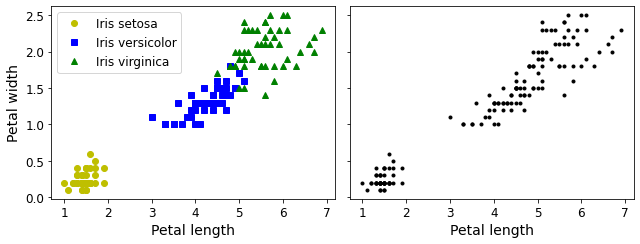

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [5]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [6]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Let's map each cluster to a class. Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

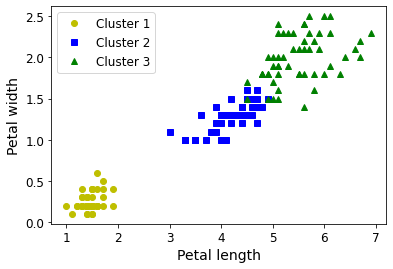

In [9]:
# Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# y_pred == clusterX, determines whcih item it is 
# y_pred==clusterX, 2 returns a list of true or false + the value "2"
# x[y_pred==ClusterX, 2] returns a list of all the petal lengths for ClusterX
# X Vals: petal length (2)
# Y Vals: petal width (3)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

Clustering is used in a wide variety of applications, including these:
- For customer segmentation
    - You can cluster your customers based on their purchases and their activity on  
        your website. This is useful to understand who your customers are and what they  
        need, so you can adapt your products and marketing campaigns to each segment.  
        For example, customer segmentation can be useful in recommender systems to  
        suggest content that other users in the same cluster enjoyed.  
        
        
- For data analysis
    - When you analyze a new dataset, it can be helpful to run a clustering algorithm,  
        and then analyze each cluster separately.
        
        
- As a dimensionality reduction technique
    - Once a dataset has been clustered, it is usually possible to measure each instance’s  
        affinity with each cluster (affinity is any measure of how well an instance fits into  
        a cluster). Each instance’s feature vector x can then be replaced with the vector of  
        its cluster affinities. If there are k clusters, then this vector is k-dimensional. This  
        vector is typically much lower-dimensional than the original feature vector, but it  
        can preserve enough information for further processing.  
        
        
- For anomaly detection (also called outlier detection)
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly.  
        For example, if you have clustered the users of your website based on their  
        behavior, you can detect users with unusual behavior, such as an unusual number  
        of requests per second. Anomaly detection is particularly useful in detecting  
        defects in manufacturing, or for fraud detection.  
        
        
- For semi-supervised learning 
     - If you only have a few labels, you could perform clustering and propagate the  
        labels to all the instances in the same cluster. This technique can greatly increase  
        the number of labels available for a subsequent supervised learning algorithm,  
        and thus improve its performance.
        
        
- For search engines
     - Some search engines let you search for images that are similar to a reference  
        image. To build such a system, you would first apply a clustering algorithm to all  
        the images in your database; similar images would end up in the same cluster.  
        Then when a user provides a reference image, all you need to do is use the  
        trained clustering model to find this image’s cluster, and you can then simply  
        return all the images from this cluster.  
        
        
- To segment an image
     - By clustering pixels according to their color, then replacing each pixel’s color  
        with the mean color of its cluster, it is possible to considerably reduce the number  
        of different colors in the image. Image segmentation is used in many object  
        detection and tracking systems, as it makes it easier to detect the contour of each  
        object.

## K-Means

### Generating the Data

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


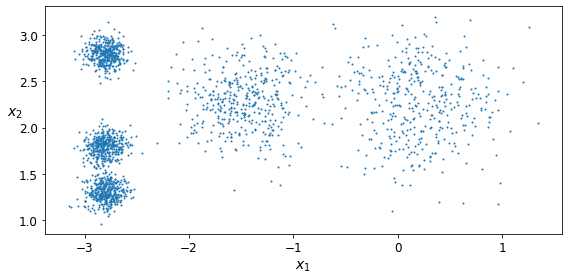

In [14]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Fit and Predict

"Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:"

In [15]:
from sklearn.cluster import KMeans

NOTE: "You have to specify the number of clusters k that the algorithm must find.  
In this example, it is pretty obvious from looking at the data that k should be set to 5,  
but in general it is not that easy. We will discuss this shortly."

In [16]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the 5 clusters:

"In the context of clustering, an  
instance’s label is the index of the cluster that this instance gets assigned to by the  
algorithm: this is not to be confused with the class labels in classification (remember  
that clustering is an unsupervised learning task)"

"The KMeans instance preserves a  
copy of the labels of the instances it was trained on, available via the labels_ instance  
variable:"

In [17]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [18]:
y_pred is kmeans.labels_

True

And the following 5 centroids (i.e., cluster centers) were estimated:

In [19]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the KMeans instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to:

In [20]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

Of course, we can predict the labels of new instances:

In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

Scatter Plot of Centroids and their labels

[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]
[0, 1, 2, 3, 4]


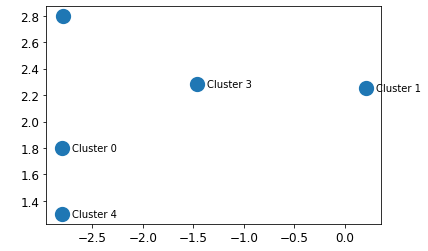

In [22]:
centroids = kmeans.cluster_centers_
labels = (kmeans.predict(centroids)).tolist() 

print(centroids)
print(labels)

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(6)

ax.scatter(centroids_x, centroids_y,marker="o", s=150, linewidths = 3)

for i, txt in enumerate(labels):
    if txt == 2:
        ax.annotate(f"Cluster {txt}", (centroids_x[i] - 0.55, centroids_y[i]-0.025))
    else:
        ax.annotate(f"Cluster {txt}", (centroids_x[i] + 0.1, centroids_y[i]-0.025))

## Decision Boundaries

![title](images/clustering_decision_boundaries.png)

"The vast majority of the instances were clearly assigned to the appropriate cluster, but  
a few instances were probably mislabeled (especially near the boundary between the  
top-left cluster and the central cluster). Indeed, the K-Means algorithm does not  
behave very well when the blobs have very different diameters because all it cares  
about when assigning an instance to a cluster is the distance to the centroid."

In [23]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

## Hard Vs Soft Clustering

"Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 5 centroids. This is what the transform() method does:"

In [24]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

"You can verify that this is indeed the Euclidian distance between each instance and each centroid:"

In [25]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

"In this example, the first instance in X_new is located at a distance of 2.81 from the  
first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from  
the fourth centroid, and 2.89 from the fifth centroid. If you have a high-dimensional  
dataset and you transform it this way, you end up with a k-dimensional dataset: this  
transformation can be a very efficient nonlinear dimensionality reduction technique."

## The K-Means algorithm

"So, how does the algorithm work? Well, suppose you were given the centroids. You  
could easily label all the instances in the dataset by assigning each of them to the cluster  
whose centroid is closest. Conversely, if you were given all the instance labels, you  
could easily locate all the centroids by computing the mean of the instances for each  
cluster. But you are given neither the labels nor the centroids, so how can you proceed?  
Well, just start by placing the centroids randomly (e.g., by picking k instances at  
random and using their locations as centroids). Then label the instances, update the  
centroids, label the instances, update the centroids, and so on until the centroids stop  
moving. The algorithm is guaranteed to converge in a finite number of steps (usually  
quite small); it will not oscillate forever"

NOTE: "The computational complexity of the algorithm is generally linear  
with regard to the number of instances m, the number of clusters k,  
and the number of dimensions n. However, this is only true when  
the data has a clustering structure. If it does not, then in the worstcase  
scenario the complexity can increase exponentially with the  
number of instances. In practice, this rarely happens, and K-Means  
is generally one of the fastest clustering algorithms."

![title](images/kmeans_algo.png)

"Although the algorithm is guaranteed to converge, it may not converge to the right  
solution (i.e., it may converge to a local optimum): whether it does or not depends on  
the centroid initialization. Figure 9-5 shows two suboptimal solutions that the algorithm  
can converge to if you are not lucky with the random initialization step."

![title](images/kmeans_algo_2.png)


## K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [26]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Saving figure kmeans_variability_plot


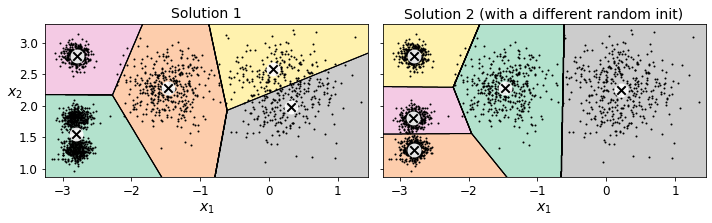

In [27]:
with threadpool_limits(limits=4, user_api='blas'):
    kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
    kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

## Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [28]:
kmeans.inertia_

211.59853725816828

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [29]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.5985372581688

The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.

In [30]:
kmeans.score(X)

-211.5985372581683

## Multiple Initalisations 

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [31]:
kmeans_rnd_init1.inertia_

219.43539442771407

In [32]:
kmeans_rnd_init2.inertia_

211.5985372581683

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.  

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that   minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [33]:
with threadpool_limits(limits=4, user_api='blas'):
    kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
    kmeans_rnd_10_inits.fit(X)

C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

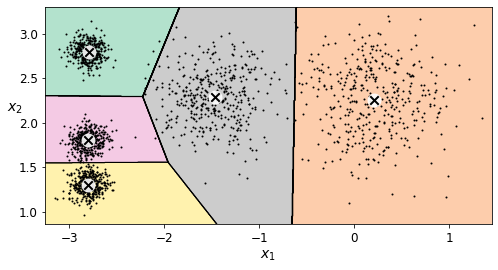

In [34]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii:

- Take one centroid $c_1$, chosen uniformly at random from the dataset.
- Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
- Repeat the previous step until all $k$ centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

In [35]:
KMeans()

KMeans()

In [36]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581683

## Accelerated K-Means

"The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data."

In [37]:
# %timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

In [38]:
# %timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

There's no big difference in this case, as the dataset is fairly small.

## Mini 

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches 



In [39]:
from sklearn.cluster import MiniBatchKMeans

In [40]:
with threadpool_limits(limits=1, user_api='blas'):

    minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
    minibatch_kmeans.fit(X)

C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [41]:
minibatch_kmeans.inertia_

211.93186531476786

![title](images/kmeans_mini_batch_1.png)


"If the dataset does not fit in memory, the simplest option is to use the memmap class, as  
we did for incremental PCA in Chapter 8. Alternatively, you can pass one mini-batch  
at a time to the partial_fit() method, but this will require much more work, since  
you will need to perform multiple initializations and select the best one yourself (see  
the mini-batch K-Means section of the notebook for an example)."

## Finding the optimal number of clusters

![title](images/kmeans_choosing_k_1.png)

"You might be thinking that we could just pick the model with the lowest inertia,  
right? Unfortunately, it is not that simple. The inertia for k=3 is 653.2, which is much  
higher than for k=5 (which was 211.6). But with k=8, the inertia is just 119.1. The  
inertia is not a good performance metric when trying to choose k because it keeps  
getting lower as we increase k. Indeed, the more clusters there are, the closer each   
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s  
plot the inertia as a function of k (see Figure 9-8)."

![title](images/kmeans_choosing_k_2.png)

"As you can see, the inertia drops very quickly as we increase k up to 4, but then it  
decreases much more slowly as we keep increasing k. This curve has roughly the  
shape of an arm, and there is an “elbow” at k = 4. So, if we did not know better, 4  
would be a good choice: any lower value would be dramatic, while any higher value  
would not help much, and we might just be splitting perfectly good clusters in half for  
no good reason."

"This technique for choosing the best value for the number of clusters is rather coarse.  
A more precise approach (but also more computationally expensive) is to use the  
silhouette score, which is the mean silhouette coefficient over all the instances. An  
instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean  
distance to the other instances in the same cluster (i.e., the mean intra-cluster distance)  
and b is the mean nearest-cluster distance (i.e., the mean distance to the  
instances of the next closest cluster, defined as the one that minimizes b, excluding  
the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A  
coefficient close to +1 means that the instance is well inside its own cluster and far  
from other clusters, while a coefficient close to 0 means that it is close to a cluster  
boundary, and finally a coefficient close to –1 means that the instance may have been  
assigned to the wrong cluster."

In [42]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\edwar\anaconda3\envs\ml_learning\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [43]:
from sklearn.metrics import silhouette_score

In [44]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [45]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


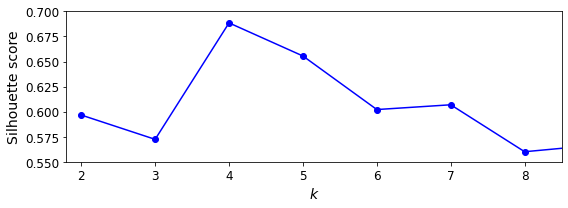

In [46]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

"As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well."

"An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:"

Saving figure silhouette_analysis_plot


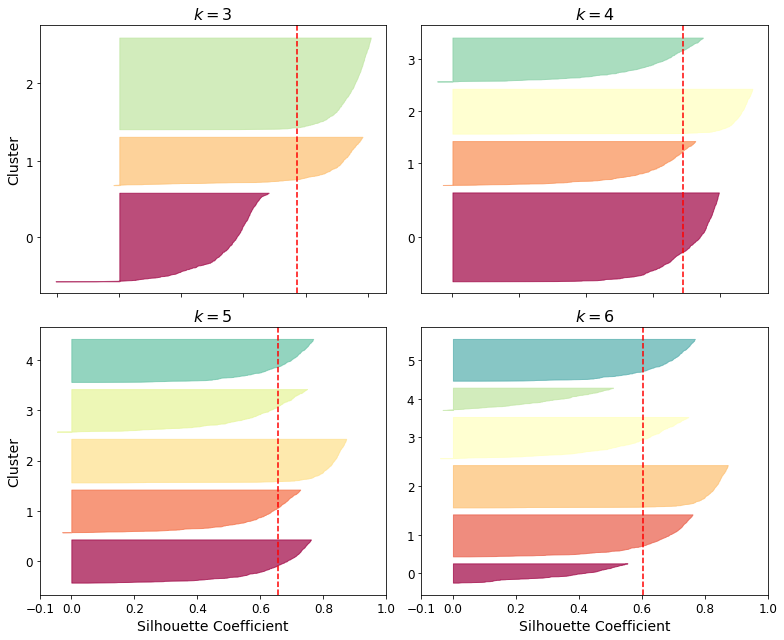

In [47]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

"The vertical dashed lines represent the silhouette score for each number of clusters.  
When most of the instances in a cluster have a lower coefficient than this score (i.e., if  
many of the instances stop short of the dashed line, ending to the left of it), then the  
cluster is rather bad since this means its instances are much too close to other clusters.  
We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4  
or k = 5, the clusters look pretty good: most instances extend beyond the dashed line,  
to the right and closer to 1.0. When k = 4, the cluster at index 1 (the third from the  
top) is rather big. When k = 5, all clusters have similar sizes. So, even though the  
overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a  
good idea to use k = 5 to get clusters of similar sizes."

## Limits of K-Means 

TIP: "It is important to scale the input features before you run K-Means,  
or the clusters may be very stretched and K-Means will perform  
poorly. Scaling the features does not guarantee that all the clusters  
will be nice and spherical, but it generally improves things."  

## Using Clustering for Image Segmentation

"Image segmentation is the task of partitioning an image into multiple segments. In   
semantic segmentation, all pixels that are part of the same object type get assigned to    
the same segment."

Eg. In a self-driving car’s vision system, all pixels that are  
part of a pedestrian’s image might be assigned to the “pedestrian” segment (there  
would be one segment containing all the pedestrians).

"In instance segmentation, all  
pixels that are part of the same individual object are assigned to the same segment." 
Eg. Different segment for each pedestrian.

"The state of the art   
in semantic or instance segmentation today is achieved using complex architectures  
based on convolutional neural networks (see Chapter 14)."

"Here, we are going to do  
something much simpler: color segmentation. We will simply assign pixels to the same  
segment if they have a similar color."

In [49]:
import urllib

# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x249908af0d0>)

First, use Matplotlib’s imread() function to load the image:

In [50]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

"The image is represented as a 3D array. The first dimension’s size is the height; the  
second is the width; and the third is the number of color channels, in this case red,  
green, and blue (RGB). In other words, for each pixel there is a 3D vector containing  
the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and  
255, if you use imageio.imread())"

"The following code  
reshapes the array to get a long list of RGB colors, then it clusters these colors using  
K-Means:"

In [57]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


"For example, it may identify a color cluster for all shades of green. Next, for each  
color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. For  
example, all shades of green may be replaced with the same light green color (assuming  
the mean color of the green cluster is light green). Finally, it reshapes this long list  
of colors to get the same shape as the original image. And we’re done!"

In [61]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


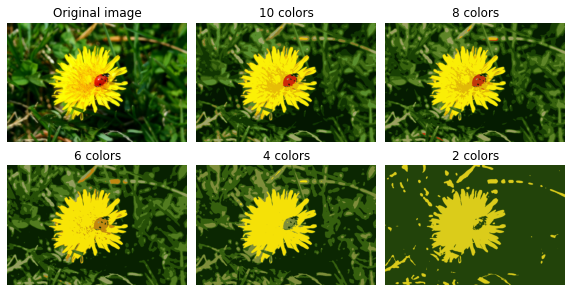

In [59]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

## Using Clustering for Preprocessing

"Clustering can be an efficient approach to dimensionality reduction, in particular as a  
preprocessing step before a supervised learning algorithm. As an example of using  
clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple  
MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits  
0 to 9. First, load the dataset:"

In [62]:
from sklearn.datasets import load_digits

In [63]:
X_digits, y_digits = load_digits(return_X_y=True)

Let's split it into a training set and a test set:

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Now let's fit a Logistic Regression model and evaluate it on the test set:

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [68]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy. Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [71]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

How much did the error rate drop?

In [72]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

"How about that? We reduced the error rate by over 35%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance."



In [73]:
from sklearn.model_selection import GridSearchCV

Warning: the following cell may take close to 20 minutes to run, or more depending on your hardware.

In [74]:
# param_grid = dict(kmeans__n_clusters=range(2, 100))
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.2s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.3s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.1s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=70; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   4.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   3.7s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',  
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [76]:
# grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [77]:
# grid_clf.score(X_test, y_test)

0.9777777777777777

## Clustering for Semi-supervised Learning
Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [78]:
n_labeled = 50

In [79]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [80]:
k = 50

In [81]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

Saving figure representative_images_diagram


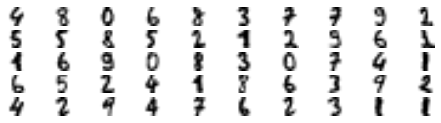

In [82]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [86]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [88]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [89]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

"Wow! We jumped from 83.3% accuracy to 92.2%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances."

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [109]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
# For i in number of clusters
for i in range(k):
    # k_means.labels == i returns a numpy array of True or False 
    # k:means.labels == 1, returns all places for digit 1 
    # y_train_propagated[kmeans.labels_==i] = y_representative_digits[i] 
    # inputs representative digit for where KMeans determined it was in Cluster i
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [110]:
# print(kmeans.labels_ == 5)
# for i in kmeans.labels_ == 5:
#    print(i)

In [91]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [92]:
log_reg.score(X_test, y_test)

0.9333333333333333

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 75th percentile closest to the centroid:

In [128]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    # in_cluster labels locations for all 1 digits (True or False)     
    in_cluster = (kmeans.labels_ == i)
    # cluster_dist = within all cluster dist, only look at in_cluster
    # Now have a list of distances in the cluster
    cluster_dist = X_cluster_dist[in_cluster]
    # Gets the 75th percenile for cluster_dist 
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # above_cutoff = further away than 75th percentile    
    above_cutoff = (X_cluster_dist > cutoff_distance)
    # if in_cluster & above_cutoff, ignore element by setting it to -1    
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [129]:
# Ignore all elements that were marked as too far away
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [130]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [131]:
log_reg.score(X_test, y_test)

0.9355555555555556

A bit better. With just 50 labeled instances (just 5 examples per class on average!), we got 93.5% performance, which is getting closer to the performance of logistic regression on the fully labeled digits dataset (which was 96.9%).

This is because the propagated labels are actually pretty good: their accuracy is close to 96%:

In [132]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9750747756729811

You could now do a few iterations of active learning:  

1) Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.   
2) Train a new model with these additional labels.

![title](images/kmeans_semi-supervised.png)
